## Загрузка данных и библиотек


In [3]:
# Загрузка библиотек
import pandas as pd  # Для работы с данными в виде таблиц (DataFrame), удобное манипулирование и анализ данных
import numpy as np  # Для выполнения числовых операций, работа с массивами и матрицами
import matplotlib.pyplot as plt  # Для построения графиков и визуализации данных
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer  # Для преобразования текстов в векторы с использованием TF-IDF
from keras.models import Sequential  # Для создания и обучения нейронных сетей
from keras.layers import LSTM, Dense, Dropout  # Для добавления слоев в нейронную сеть (LSTM, Dense, Dropout)
import keras  # Основной модуль для работы с нейронными 
import keras_tuner as kt # Модуль для побора гиперпараметров нейронной сети
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Для оценки качества модели (MAE, MSE, R²)
from keras.preprocessing.sequence import pad_sequences  # Для выравнивания последовательностей (паддинг) перед подачей в нейронную сеть
from datetime import datetime  # Для работы с датами и временем
import seaborn as sns  # Для создания красивых статистических графиков и визуализаций
from sklearn.feature_extraction.text import CountVectorizer  # Для преобразования текстов в векторы с использованием подсчета частоты слов
from catboost import CatBoostRegressor # Модель машинного обучения, регрессии
import warnings # модуль для игнорирования предупреждений
warnings.filterwarnings("ignore") # Игнорирование предупреждений

In [4]:
# Загрузка обучающих данных
train = pd.read_csv(r'C:\Users\ffedo\Desktop\data_science\aiijc_2024\train.csv', sep=';')
news = pd.read_csv(r'C:\Users\ffedo\Desktop\data_science\aiijc_2024\news.csv')

In [5]:
# Загрузка тестовых данных
test = pd.read_csv(r'C:\Users\ffedo\Desktop\data_science\aiijc_2024\test.csv', sep=';')

## Просматриваем данные


In [6]:
# вывод тренировочного датафрейма
train

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,VKCO,1,2024-02-01,10:00:00,698.20,698.20,696.20,696.60,7099
1,VKCO,1,2024-02-01,10:01:00,696.60,698.00,696.00,698.00,7629
2,VKCO,1,2024-02-01,10:02:00,697.60,697.60,695.80,696.60,5726
3,VKCO,1,2024-02-01,10:03:00,696.40,696.80,695.80,695.80,3972
4,VKCO,1,2024-02-01,10:04:00,695.80,696.00,695.00,695.20,5956
...,...,...,...,...,...,...,...,...,...
434784,SIBN,1,2024-05-10,23:45:00,751.50,751.55,751.50,751.55,44
434785,SIBN,1,2024-05-10,23:46:00,751.55,751.70,751.00,751.20,1996
434786,SIBN,1,2024-05-10,23:47:00,751.20,751.25,751.00,751.00,801
434787,SIBN,1,2024-05-10,23:48:00,751.00,751.00,750.95,751.00,230


In [7]:
# вывод тестового датафрейма
test

,TICKER,DATE,TIME
0,CHMF,2024-06-07,10:00:00
1,CHMF,2024-06-07,11:00:00
2,CHMF,2024-06-07,12:00:00
3,CHMF,2024-06-07,13:00:00
4,CHMF,2024-06-07,14:00:00
...,...,...,...
2125,SBER,2024-06-10,18:00:00
2126,SBER,2024-06-10,20:00:00
2127,SBER,2024-06-10,21:00:00
2128,SBER,2024-06-10,22:00:00


In [8]:
# вывод датафрейма с новостями
news

,title,created_at,source,url,content
0,ЦБ Армении снизил ставку рефинансирования до 8...,2024-04-30 08:49:25+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,"Центробанк Армении сообщил во вторник, что сни..."
1,"Рынок акций США закрылся падением, Dow Jones ...",2024-05-23 20:30:00+00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
2,Активность в промпроизводстве КНР в апр росла ...,2024-04-30 06:43:27+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Активность в промышленном секторе Китая в апре...
3,"Рынок акций США закрылся ростом, Dow Jones пр...",2024-06-05 20:30:00+00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
4,Активность в секторе услуг КНР замедлила рост ...,2024-04-30 06:39:27+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Деловая активность в секторе услуг Китая снизи...
...,...,...,...,...,...
4146,РФ начала регулярный выкуп алмазов Алросы в го...,2024-03-28 17:29:12+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Российский Минфин подтвердил договоренность о ...
4147,"У FTX остались токены Solana на $7,5 млрд. Кто...",2024-03-28 17:21:42+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/rbc_crypto...,Покупка 41 млн токенов Solana (SOL) у биржи-ба...
4148,Покупка этих альткоинов сейчас равносильна пок...,2024-06-08 15:03:24+00:00,Investing,https:\/\/ru.investing.com\/news\/cryptocurren...,"Happycoin.club - Cобытия, которые сейчас проис..."
4149,Золото скорректируется к $2200–2300 за унцию в...,2024-05-20 12:00:00+00:00,Finam,https:\/\/www.finam.ru\/publications\/item\/zo...,Торги 17 мая на американских фондовых биржах х...


## Разведочный анализ данных

In [9]:
train.info()# проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434789 entries, 0 to 434788
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TICKER  434789 non-null  object 
 1   PER     434789 non-null  int64  
 2   DATE    434789 non-null  object 
 3   TIME    434789 non-null  object 
 4   OPEN    434789 non-null  float64
 5   HIGH    434789 non-null  float64
 6   LOW     434789 non-null  float64
 7   CLOSE   434789 non-null  float64
 8   VOL     434789 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 29.9+ MB


In [10]:
train.isna().sum().sum() # пропусков не обнаружено

0

In [11]:
train.duplicated().sum() # дубликатов не обнаружено

0

In [12]:
train.describe() # Статистический анализ

,PER,OPEN,HIGH,LOW,CLOSE,VOL
count,434789.0,434789.000000,434789.000000,434789.000000,434789.000000,4.347890e+05
mean,1.0,1575.680011,1576.124076,1575.183374,1575.674370,6.338320e+03
std,0.0,1334.975535,1335.378412,1334.538765,1334.973512,3.477737e+04
min,1.0,273.000000,273.300000,272.600000,273.000000,1.000000e+00
25%,1.0,318.950000,319.050000,318.850000,318.950000,9.500000e+01
50%,1.0,834.400000,834.550000,834.200000,834.400000,4.940000e+02
75%,1.0,1957.000000,1957.200000,1956.800000,1957.000000,2.391000e+03
max,1.0,4386.600000,4390.000000,4385.800000,4386.600000,8.002170e+06


### Визуализация данных

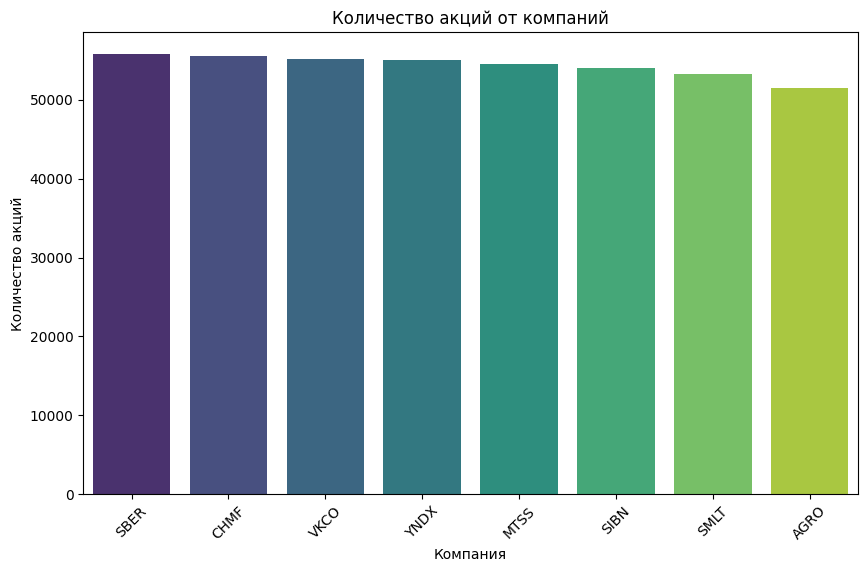

In [51]:
#построим график зависимости количества акций от компаний

# Считаем количество акций от каждой компании
source_counts = train['TICKER'].value_counts().reset_index()
source_counts.columns = ['TICKER', 'count']

# Строим график с использованием seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TICKER', y='count', data=source_counts, palette='viridis')
plt.xlabel('Компания')
plt.ylabel('Количество акций')
plt.title('Количество акций от компаний')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.show()

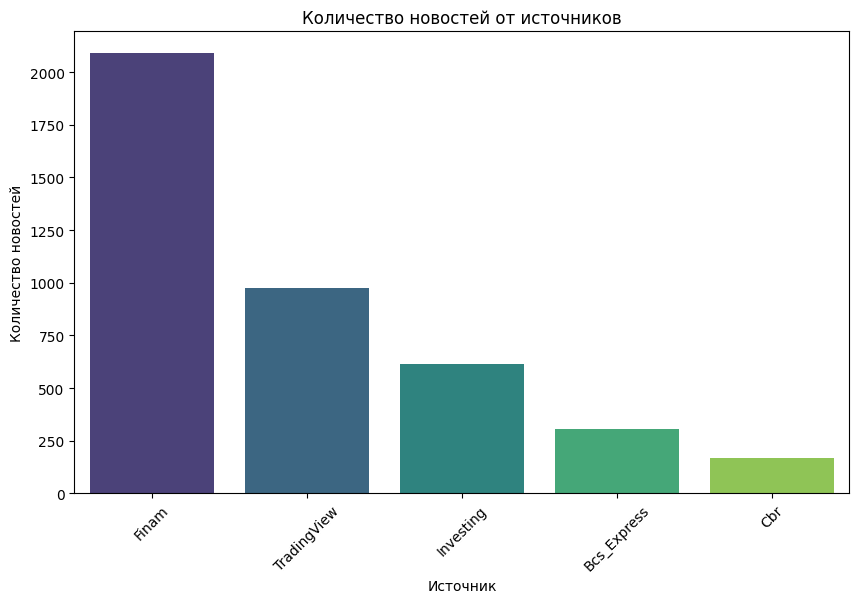

In [13]:
#построим график зависимости количества новостей от источника

# Считаем количество новостей от каждого источника
source_counts = news['source'].value_counts().reset_index()
source_counts.columns = ['source', 'count']

# Строим график с использованием seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='count', data=source_counts, palette='viridis')
plt.xlabel('Источник')
plt.ylabel('Количество новостей')
plt.title('Количество новостей от источников')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.show()

### Обработка данных

In [14]:
# Объединение DATE и TIME в один столбец для удобства
train['DATETIME'] = pd.to_datetime(train['DATE'] + ' ' + train['TIME'])
news['created_at'] = pd.to_datetime(news['created_at'])

In [15]:
# Округлим колонку с датой и временем в датасетах до часов
train['DATETIME'] = train['DATETIME'].dt.round('H')
news['created_at'] = news['created_at'].dt.round('H').dt.tz_localize(None)

In [16]:
# вывод тренировочного датафрейма
train

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,DATETIME
0,VKCO,1,2024-02-01,10:00:00,698.20,698.20,696.20,696.60,7099,2024-02-01 10:00:00
1,VKCO,1,2024-02-01,10:01:00,696.60,698.00,696.00,698.00,7629,2024-02-01 10:00:00
2,VKCO,1,2024-02-01,10:02:00,697.60,697.60,695.80,696.60,5726,2024-02-01 10:00:00
3,VKCO,1,2024-02-01,10:03:00,696.40,696.80,695.80,695.80,3972,2024-02-01 10:00:00
4,VKCO,1,2024-02-01,10:04:00,695.80,696.00,695.00,695.20,5956,2024-02-01 10:00:00
...,...,...,...,...,...,...,...,...,...,...
434784,SIBN,1,2024-05-10,23:45:00,751.50,751.55,751.50,751.55,44,2024-05-11 00:00:00
434785,SIBN,1,2024-05-10,23:46:00,751.55,751.70,751.00,751.20,1996,2024-05-11 00:00:00
434786,SIBN,1,2024-05-10,23:47:00,751.20,751.25,751.00,751.00,801,2024-05-11 00:00:00
434787,SIBN,1,2024-05-10,23:48:00,751.00,751.00,750.95,751.00,230,2024-05-11 00:00:00


In [17]:
# вывод датафрейма с новостями
news

,title,created_at,source,url,content
0,ЦБ Армении снизил ставку рефинансирования до 8...,2024-04-30 09:00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,"Центробанк Армении сообщил во вторник, что сни..."
1,"Рынок акций США закрылся падением, Dow Jones ...",2024-05-23 20:00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
2,Активность в промпроизводстве КНР в апр росла ...,2024-04-30 07:00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Активность в промышленном секторе Китая в апре...
3,"Рынок акций США закрылся ростом, Dow Jones пр...",2024-06-05 20:00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
4,Активность в секторе услуг КНР замедлила рост ...,2024-04-30 07:00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Деловая активность в секторе услуг Китая снизи...
...,...,...,...,...,...
4146,РФ начала регулярный выкуп алмазов Алросы в го...,2024-03-28 17:00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Российский Минфин подтвердил договоренность о ...
4147,"У FTX остались токены Solana на $7,5 млрд. Кто...",2024-03-28 17:00:00,TradingView,https:\/\/ru.tradingview.com\/news\/rbc_crypto...,Покупка 41 млн токенов Solana (SOL) у биржи-ба...
4148,Покупка этих альткоинов сейчас равносильна пок...,2024-06-08 15:00:00,Investing,https:\/\/ru.investing.com\/news\/cryptocurren...,"Happycoin.club - Cобытия, которые сейчас проис..."
4149,Золото скорректируется к $2200–2300 за унцию в...,2024-05-20 12:00:00,Finam,https:\/\/www.finam.ru\/publications\/item\/zo...,Торги 17 мая на американских фондовых биржах х...


In [18]:
# Векторизируем новости
vectorizer = TfidfVectorizer(max_features=100, max_df=0.7)
X_news = vectorizer.fit_transform(news['content']).toarray()

In [19]:
# вывод векторизированных новостей
X_news

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03535508, 0.03817808, 0.08432938, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19930805, 0.        , 0.        , ..., 0.11195484, 0.05291574,
        0.        ],
       [0.        , 0.15521539, 0.        , ..., 0.06055526, 0.05724319,
        0.14923479],
       [0.06779994, 0.        , 0.        , ..., 0.05712663, 0.05400209,
        0.        ]])

In [20]:
# Создание признаков на основе новостей
def create_features_from_news(train_data, news_data):
    news_data['DATETIME'] = pd.to_datetime(news_data['created_at'])#.dt.time
    news_count = news_data.groupby('DATETIME').count()['title'].reset_index()
    news_count.columns = ['DATETIME', 'NEWS_COUNT']

    train_data = pd.merge(train_data, news_count, how='left', on='DATETIME')

    # Заполнение пропущенных значений
    train_data['NEWS_COUNT'].fillna(0, inplace=True)

    return train_data

In [21]:
# применение функции
train = create_features_from_news(train, news)

In [22]:
# вывод тренировочного датафрейма
train

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,DATETIME,NEWS_COUNT
0,VKCO,1,2024-02-01,10:00:00,698.20,698.20,696.20,696.60,7099,2024-02-01 10:00:00,0.0
1,VKCO,1,2024-02-01,10:01:00,696.60,698.00,696.00,698.00,7629,2024-02-01 10:00:00,0.0
2,VKCO,1,2024-02-01,10:02:00,697.60,697.60,695.80,696.60,5726,2024-02-01 10:00:00,0.0
3,VKCO,1,2024-02-01,10:03:00,696.40,696.80,695.80,695.80,3972,2024-02-01 10:00:00,0.0
4,VKCO,1,2024-02-01,10:04:00,695.80,696.00,695.00,695.20,5956,2024-02-01 10:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
434784,SIBN,1,2024-05-10,23:45:00,751.50,751.55,751.50,751.55,44,2024-05-11 00:00:00,0.0
434785,SIBN,1,2024-05-10,23:46:00,751.55,751.70,751.00,751.20,1996,2024-05-11 00:00:00,0.0
434786,SIBN,1,2024-05-10,23:47:00,751.20,751.25,751.00,751.00,801,2024-05-11 00:00:00,0.0
434787,SIBN,1,2024-05-10,23:48:00,751.00,751.00,750.95,751.00,230,2024-05-11 00:00:00,0.0


In [23]:
# Проверим работоспособность функции в тренировочном датафрейме
train["NEWS_COUNT"].sum()

701876.0

## Подготовка данных для обучения модели

In [24]:
# Разделение на X и Y , удаление ненужных данных
X = train[['OPEN', 'HIGH', 'LOW', 'VOL', 'NEWS_COUNT']].values
y = train['CLOSE'].values

In [25]:
# вывод основных признаков
X

array([[ 698.2 ,  698.2 ,  696.2 , 7099.  ,    0.  ],
       [ 696.6 ,  698.  ,  696.  , 7629.  ,    0.  ],
       [ 697.6 ,  697.6 ,  695.8 , 5726.  ,    0.  ],
       ...,
       [ 751.2 ,  751.25,  751.  ,  801.  ,    0.  ],
       [ 751.  ,  751.  ,  750.95,  230.  ,    0.  ],
       [ 750.95,  751.  ,  750.95,   76.  ,    0.  ]])

In [26]:
# вывод целевого признака
y

array([696.6, 698. , 696.6, ..., 751. , 751. , 751. ])

In [27]:
# Разделяем данные на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# проверимм корректность выполнения функции "train_test_split"
X_train

array([[3592. , 3595. , 3591.5,   81. ,    8. ],
       [1880. , 1880. , 1880. ,    5. ,    0. ],
       [3438. , 3439.5, 3438. ,   68. ,    0. ],
       ...,
       [3511.4, 3511.6, 3508. ,  750. ,    0. ],
       [3992.8, 3992.8, 3990.4,  196. ,    0. ],
       [3302.8, 3303. , 3300.6,  760. ,    0. ]])

## Разработка модели

### CatBoostRegressor

In [29]:
# Разработаем базовую модель машинного обучения на основе алгоритма "CatBoost"
clf = CatBoostRegressor(
    eval_metric = 'MAE',
    depth=9,
    l2_leaf_reg=2,
    task_type = 'GPU',
    iterations=1200,
    learning_rate=3e-4,
)
clf.fit(X_train,y_train, eval_set=(X_val,y_val), verbose=200)

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1117.5514546	test: 1115.5386278	best: 1115.5386278 (0)	total: 81ms	remaining: 1m 37s
200:	learn: 1052.5525327	test: 1050.6921502	best: 1050.6921502 (200)	total: 1.99s	remaining: 9.88s
400:	learn: 991.4606116	test: 989.7398744	best: 989.7398744 (400)	total: 3.86s	remaining: 7.69s
600:	learn: 933.8944487	test: 932.3047908	best: 932.3047908 (600)	total: 5.67s	remaining: 5.65s
800:	learn: 879.6527509	test: 878.1870788	best: 878.1870788 (800)	total: 7.73s	remaining: 3.85s
1000:	learn: 828.6051560	test: 827.2432209	best: 827.2432209 (1000)	total: 9.7s	remaining: 1.93s
1199:	learn: 780.7715356	test: 779.4961246	best: 779.4961246 (1199)	total: 11.6s	remaining: 0us
bestTest = 779.4961246
bestIteration = 1199


In [30]:
y_pred =  clf.predict(X_val)# предсказываем валидационную выборку    

In [31]:
#Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

779.4959438075313 868367.6389406631 0.5117619038110007


По метрикам видно , что модели машинного обучения плохо подходят для решения данной задачи, попробуем использовать нейросеть для решения данной задачи 

## Создание и обучение итоговой модели

Архитектура "LSTM" специально разработана для обработки данных временных рядов с использованием ячеек памяти, которые сохраняют информацию в течение продолжительных периодов времени. Всвязи с этим мы будем использовать данную архитектуру для решения данной задачи 

In [32]:
# Изменим размерность для корректной работы модели с архитектурой "LSTM"
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

In [33]:
# Иницилизируем модель
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:
# Сохранение наилучшей модели
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='mymodel.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [35]:
# Обучим модель
model.fit(X_train, y_train, epochs=10, batch_size=64, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/10
5422/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 473757.3438
Epoch 1: val_loss improved from inf to 10341.94824, saving model to mymodel.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 7s 993us/step - loss: 473068.4375 - val_loss: 10341.9482
Epoch 2/10
5417/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 119883.6094
Epoch 2: val_loss improved from 10341.94824 to 5278.80713, saving model to mymodel.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 119882.0938 - val_loss: 5278.8071
Epoch 3/10
5382/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 116607.1953
Epoch 3: val_loss improved from 5278.80713 to 3102.03345, saving model to mymodel.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 116613.0625 - val_loss: 3102.0334
Epoch 4/10
5389/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 118204.9375
Epoch 4: val_loss did not improve from 3102.03345
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 5s 969us/step - loss: 118196.1953 - val_loss: 13381.3076
Epoch 5/10
5421/5435 ━━━━━━━━━━━━━━━━━━━━

In [36]:
# Загрузка лучшей модели
model2 = keras.models.load_model('mymodel.keras')

### Оценка качества модели

In [37]:
y_pred =  model2.predict(X_val) # предсказываем валидационную выборку    

2718/2718 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step


In [38]:
# Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

30.664320856345856 2132.3213748164494 0.9988011062575137


В целом, результат хороший, особенно с учетом высокого R² = 0.998. Всвязи с этим будем продолжать использовать архитектуру "LSTM" для решения данной задачи. Но проведем подбор основных гиперпараметров с помощью "KerasTuner".

## Проверка гипотезы

В качестве гипотезы рассмотрим обучение нейронной сети без использования новостей. Посмтрим на результаты и оценим насколько гипотеза была оправдана.

In [39]:
# Разделение на X и Y , удаление ненужных данных
X_gip = train[['OPEN', 'HIGH', 'LOW', 'VOL']].values
y_gip = train['CLOSE'].values

In [40]:
# вывод основных признаков
X_gip

array([[ 698.2 ,  698.2 ,  696.2 , 7099.  ],
       [ 696.6 ,  698.  ,  696.  , 7629.  ],
       [ 697.6 ,  697.6 ,  695.8 , 5726.  ],
       ...,
       [ 751.2 ,  751.25,  751.  ,  801.  ],
       [ 751.  ,  751.  ,  750.95,  230.  ],
       [ 750.95,  751.  ,  750.95,   76.  ]])

In [41]:
# вывод целевого признака
y_gip

array([696.6, 698. , 696.6, ..., 751. , 751. , 751. ])

In [42]:
# Разделяем данные на обучающую и валидационную выборку
X_train_gip, X_val_gip, y_train_gip, y_val_gip = train_test_split(X_gip, y_gip, test_size=0.2, random_state=42)

In [43]:
# проверимм корректность выполнения функции "train_test_split"
X_train_gip

array([[3592. , 3595. , 3591.5,   81. ],
       [1880. , 1880. , 1880. ,    5. ],
       [3438. , 3439.5, 3438. ,   68. ],
       ...,
       [3511.4, 3511.6, 3508. ,  750. ],
       [3992.8, 3992.8, 3990.4,  196. ],
       [3302.8, 3303. , 3300.6,  760. ]])

In [44]:
# Изменим размерность для корректной работы модели с архитектурой "LSTM"
X_train_gip = X_train_gip.reshape((X_train_gip.shape[0], 1, X_train_gip.shape[1]))
X_val_gip = X_val_gip.reshape((X_val_gip.shape[0], 1, X_val_gip.shape[1]))

In [45]:
# Иницилизируем модель
model_gip = Sequential()
model_gip.add(LSTM(50, activation='relu', input_shape=(X_train_gip.shape[1], X_train_gip.shape[2])))
model_gip.add(Dropout(0.2))
model_gip.add(Dense(1))
model_gip.compile(optimizer='adam', loss='mse')

In [46]:
# Сохранение наилучшей модели
callbacks_gip = [
    keras.callbacks.ModelCheckpoint(
        filepath='mymodel_gip.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [47]:
# Обучим модель
model_gip.fit(X_train_gip, y_train_gip, epochs=10, batch_size=64, callbacks=callbacks_gip, validation_data=(X_val_gip, y_val_gip))

Epoch 1/10
5395/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 431357.1562
Epoch 1: val_loss improved from inf to 15323.85449, saving model to mymodel_gip.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 429526.8750 - val_loss: 15323.8545
Epoch 2/10
5417/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 99055.7422
Epoch 2: val_loss improved from 15323.85449 to 4920.47559, saving model to mymodel_gip.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 5s 985us/step - loss: 99057.8438 - val_loss: 4920.4756
Epoch 3/10
5379/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 98005.9609
Epoch 3: val_loss did not improve from 4920.47559
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 5s 963us/step - loss: 97990.8438 - val_loss: 4933.3252
Epoch 4/10
5394/5435 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 88258.2188
Epoch 4: val_loss improved from 4920.47559 to 2220.45776, saving model to mymodel_gip.keras
5435/5435 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 88254.5078 - val_loss: 2220.4578
Epoch 5/10
5403/5435 ━━━━━━━━━━━━━━━

In [48]:
# Загрузка лучшей модели
model_gip = keras.models.load_model('mymodel_gip.keras')

In [49]:
y_pred_gip =  model_gip.predict(X_val_gip) # предсказываем валидационную выборку    

2718/2718 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step


In [50]:
# Проведем оценку модели
mae = mean_absolute_error(y_val_gip, y_pred_gip)
mse = mean_squared_error(y_val_gip, y_pred_gip)
r2 = r2_score(y_val_gip, y_pred_gip)
print(mae,mse,r2)

26.091076464924885 2220.457077777153 0.9987515521218112


По метрикам по окончанию обучения мы видим, что результат без использования новостей получился хуже, следовательно гипотеза не опрадала себя.

## Подбор Гиперпараметров

ReLU может улучшить скорость обучения и бороться с затухающим градиентом, особенно на больших данных.

In [48]:
# Проведём обучение нейронной сети с подбором гиперпараметров

def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('units', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # протестируем с различной выходной размерностью
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1))) # Протестируем с различными значениями Dropout от 0.1 до 0.5
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']), loss='mse') # Проверим работу нейронной сети с различными оптимайзерами
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='lstm_tuning')

# Проведем обучение нейроной сети
tuner.search(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)

Trial 26 Complete [00h 00m 36s]
val_loss: 38984.9609375

Best val_loss So Far: 450.6872863769531
Total elapsed time: 00h 07m 18s


In [49]:
# В качестве модели будем использовать модель, показавшую себя наилучшим образом по ходу обучения 
best_model = tuner.get_best_models(num_models=1)[0]

## Оценка качества модели после подбора гиперпараметров

In [50]:
y_pred =  best_model.predict(X_val) # предсказываем валидационную выборку    

2718/2718 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step


In [51]:
# Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

13.720933848587464 450.6873875854992 0.9997466018513086


Мы видим, что результаты модели улучшились, возьмем ее за окончательное решение

## Предсказание

In [53]:
# Создадим функцию для предобработки тестовых данных
def prepare_test_data(test_data, train_data, news_data):
    # Преобразуем дату и время в datetime
    test_data['DATETIME'] = pd.to_datetime(test_data['DATE'] + ' ' + test_data['TIME'])

    # Получаем последние данные для каждого тикера, которые могут быть использованы для теста
    last_rows = train_data[train_data['TICKER'].isin(test_data['TICKER'])]
    last_rows = last_rows[last_rows['DATETIME'] < test_data['DATETIME'].max()].groupby('TICKER').last().reset_index()

    # Объединяем последние данные с тестовой выборкой
    test_data = test_data.merge(last_rows[['TICKER', 'OPEN', 'HIGH', 'LOW', 'VOL']], on='TICKER', how='left')

    # Создание признаков на основе новостей
    news_data['DATETIME'] = pd.to_datetime(news_data['created_at'])#.dt.time
    news_count = news_data.groupby('DATETIME').count()['title'].reset_index()
    news_count.columns = ['DATETIME', 'NEWS_COUNT']

    test_data = pd.merge(test_data, news_count, how='left', on='DATETIME')

    # Заполнение пропущенных значений
    test_data['NEWS_COUNT'].fillna(0, inplace=True)

    return test_data

In [54]:
# применение функции
test = prepare_test_data(test, train, news)

In [55]:
test # вывод тестового датафрейма

,TICKER,DATE,TIME,DATETIME,OPEN,HIGH,LOW,VOL,NEWS_COUNT
0,CHMF,2024-06-07,10:00:00,2024-06-07 10:00:00,1960.0,1960.0,1959.60,305,1.0
1,CHMF,2024-06-07,11:00:00,2024-06-07 11:00:00,1960.0,1960.0,1959.60,305,7.0
2,CHMF,2024-06-07,12:00:00,2024-06-07 12:00:00,1960.0,1960.0,1959.60,305,7.0
3,CHMF,2024-06-07,13:00:00,2024-06-07 13:00:00,1960.0,1960.0,1959.60,305,9.0
4,CHMF,2024-06-07,14:00:00,2024-06-07 14:00:00,1960.0,1960.0,1959.60,305,3.0
...,...,...,...,...,...,...,...,...,...
2125,SBER,2024-06-10,18:00:00,2024-06-10 18:00:00,313.4,313.5,313.33,60460,0.0
2126,SBER,2024-06-10,20:00:00,2024-06-10 20:00:00,313.4,313.5,313.33,60460,0.0
2127,SBER,2024-06-10,21:00:00,2024-06-10 21:00:00,313.4,313.5,313.33,60460,0.0
2128,SBER,2024-06-10,22:00:00,2024-06-10 22:00:00,313.4,313.5,313.33,60460,0.0


In [56]:
# Проверим работоспособность функции в тестовом датафрейме
test["NEWS_COUNT"].sum()

7174.0

In [57]:
# Подготовка тестовой выборки для модели
X_pred = test[['OPEN', 'HIGH', 'LOW', 'VOL', 'NEWS_COUNT']].values
X_pred = X_pred.reshape((X_pred.shape[0], 1, X_pred.shape[1]))

In [58]:
# Предскажем данные
predictions = model2.predict(X_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [59]:
# Сохранение результатов
submission = test[['TICKER', 'DATE', 'TIME']].copy()
submission['CLOSE'] = predictions

In [60]:
# просмотрим submission
submission 

,TICKER,DATE,TIME,CLOSE
0,CHMF,2024-06-07,10:00:00,1975.773438
1,CHMF,2024-06-07,11:00:00,1979.455078
2,CHMF,2024-06-07,12:00:00,1979.455078
3,CHMF,2024-06-07,13:00:00,1980.682007
4,CHMF,2024-06-07,14:00:00,1977.000610
...,...,...,...,...
2125,SBER,2024-06-10,18:00:00,269.672638
2126,SBER,2024-06-10,20:00:00,269.672638
2127,SBER,2024-06-10,21:00:00,269.672638
2128,SBER,2024-06-10,22:00:00,269.672638


In [63]:
# Скачивание результатов
submission.to_csv('submission.csv', index=False, sep=';') 